# SEGMENTATION pipeline
## Imports

In [46]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import scipy
from scipy.fft import fftn, fftshift

from sklearn import preprocessing
from skimage import segmentation, morphology, measure, feature, filters, color, exposure, io
from skimage.color import label2rgb
from skimage.filters import difference_of_gaussians, window, meijering, sato, frangi, hessian

## Read image in

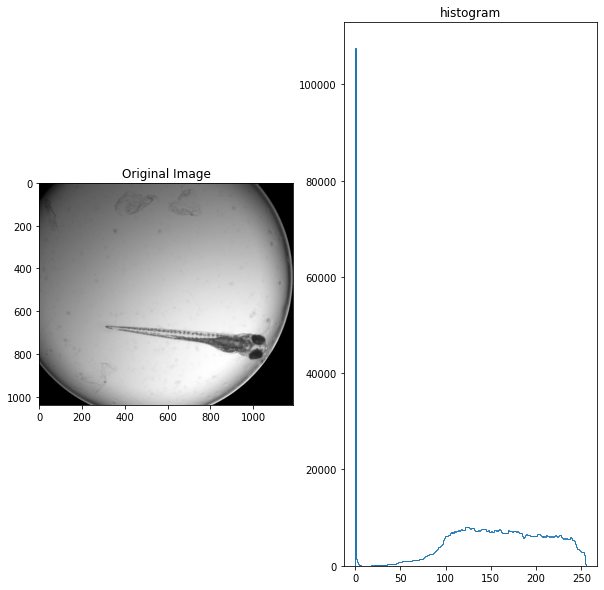

In [47]:
start_img = io.imread('zfc.jpg', as_gray=True)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

ax[0].imshow(start_img, cmap='gray')
ax[0].set_title('Original Image')

ax[1].hist(start_img.ravel(), bins=256, histtype='step')
ax[1].set_title('histogram')
plt.show()

## Applying blur

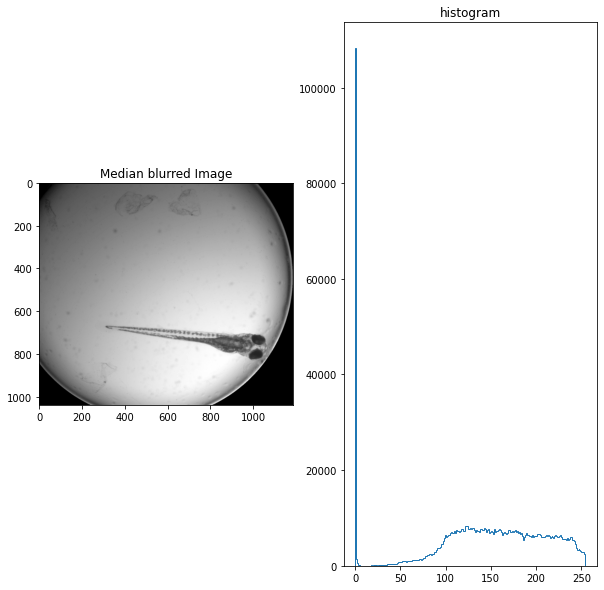

In [48]:
median_blurred = filters.median(start_img, morphology.disk(2))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

ax[0].imshow(median_blurred, cmap='gray')
ax[0].set_title('Median blurred Image')

ax[1].hist(median_blurred.ravel(), bins=256, histtype='step')
ax[1].set_title('histogram')
plt.show()

## Trying thresholdings

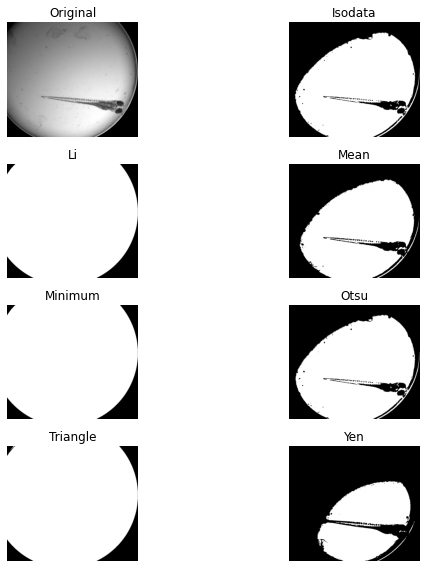

In [49]:
fig, ax = filters.try_all_threshold(median_blurred, figsize=(10, 8), verbose=False)
plt.show()

## DIFFERENCE OF GAUSSIANS


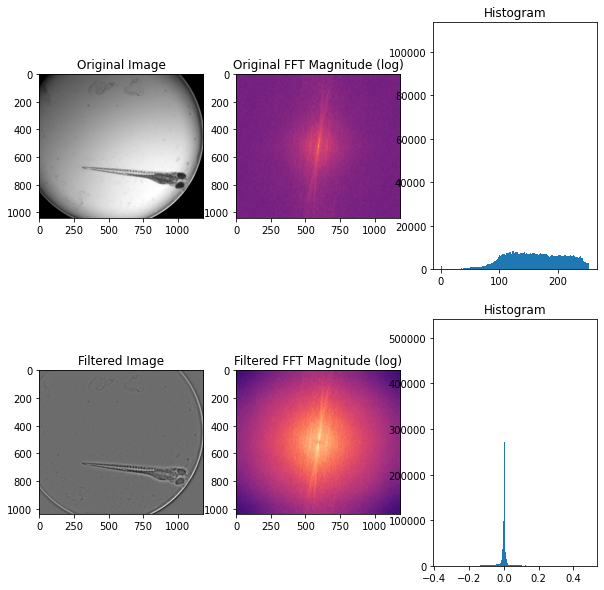

In [50]:
gaussian_diff = median_blurred
window_image = gaussian_diff * window('hann', gaussian_diff.shape)  # window image to improve FFT
filtered_image = difference_of_gaussians(gaussian_diff, 1, 10)
filtered_wimage = filtered_image * window('hann', gaussian_diff.shape)
im_f_mag = fftshift(np.abs(fftn(window_image)))
fim_f_mag = fftshift(np.abs(fftn(filtered_wimage)))

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))
ax[0, 0].imshow(gaussian_diff, cmap='gray')
ax[0, 0].set_title('Original Image')
im_f_mag = np.log(im_f_mag)
ax[0, 1].imshow(im_f_mag, cmap='magma')
ax[0, 1].set_title('Original FFT Magnitude (log)')
ax[0, 2].hist(gaussian_diff.ravel(), bins=256)
ax[0, 2].set_title('Histogram')

ax[1, 0].imshow(filtered_image, cmap='gray')
ax[1, 0].set_title('Filtered Image')

fim_f_mag = np.log(fim_f_mag)
ax[1, 1].imshow(fim_f_mag, cmap='magma')
ax[1, 1].set_title('Filtered FFT Magnitude (log)')
ax[1, 2].hist(filtered_image.ravel(), bins=256)
ax[1, 2].set_title('Histogram')

plt.show()

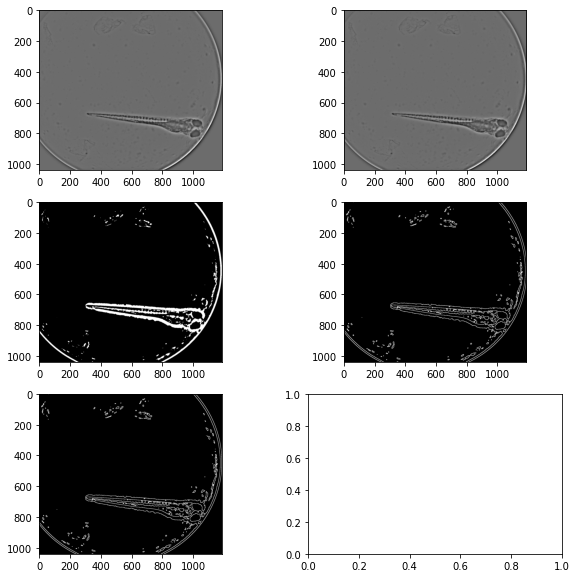

In [60]:
from src.filters.local_range_filter import range_filter

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
ax[0, 0].imshow(filtered_image, 'gray')

norm = cv.normalize(filtered_image, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
ax[0, 1].imshow(norm, 'gray')

triangle = filters.threshold_triangle(norm)
th = norm > triangle
ax[1, 0].imshow(th, 'gray')

str_elem3 = morphology.square(3)

eroded = morphology.erosion(th, str_elem3)
dilated = morphology.dilation(th, str_elem3)
range_filter = eroded ^ dilated
triangle = filters.threshold_triangle(norm)
ax[1, 1].imshow(range_filter, 'gray')

ax[2, 0].imshow(range_filter, 'gray')


ax[2, 0].imshow(range_filter, 'gray')


plt.show()

## Filtered img histogram

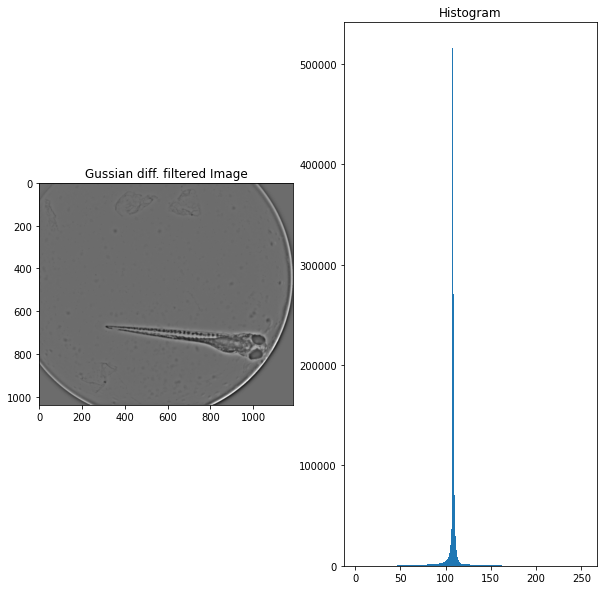

In [52]:
normalized_img = cv.normalize(filtered_image, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

ax[0].imshow(filtered_image, cmap='gray')
ax[0].set_title('Gussian diff. filtered Image')

ax[1].hist(normalized_img.ravel(), bins=256, histtype='bar')
ax[1].set_title('Histogram')

plt.show()

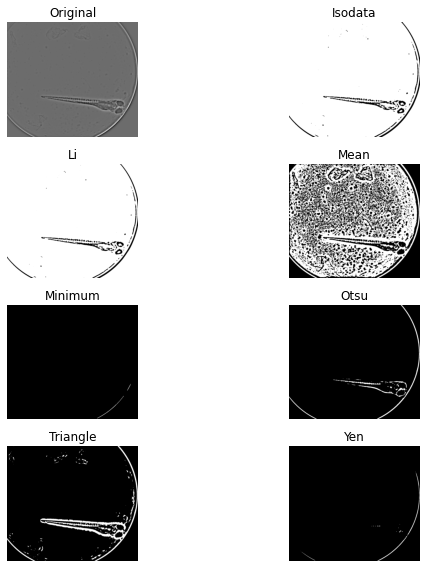

In [53]:
fig, ax = filters.try_all_threshold(filtered_image, figsize=(10, 8), verbose=False)
plt.show()

## Apply triangle thresholding

In [55]:
triangle_th = filters.threshold_triangle(normalized_img)

plt.show()
## Filtered img histogram
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

th_img = normalized_img > triangle_th

ax[0].imshow(th_img, 'gray')
ax[0].set_title('Triangle thresholded Image')

ax[1].hist(th_img, bins=256, histtype='bar')
ax[1].set_title('Histogram')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001E435F8A0D0> (for post_execute):


KeyboardInterrupt: 

Morphological transformations

In [ ]:
str_elem = morphology.disk(3)
str_elem2 = morphology.disk(5)
str_elem3 = morphology.square(3)

eroded = morphology.erosion(th_img, str_elem3)
dilated = morphology.dilation(th_img, str_elem3)

opened_first = morphology.opening(th_img, str_elem2)
closed_first = morphology.binary_closing(th_img, str_elem2)

opened_second = morphology.opening(closed_first, str_elem2)
closed_second = morphology.closing(closed_first, str_elem2)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

ax[0, 0].imshow(opened_first, 'gray')
ax[0, 0].set_title('opened_first')

ax[0, 1].imshow(closed_first, 'gray')
ax[0, 1].set_title('closed_first')

ax[1, 0].imshow(opened_second, 'gray')
ax[1, 0].set_title('opened_second')

ax[1, 1].imshow(closed_second, 'gray')
ax[1, 1].set_title('closed_second')

plt.show()

closed = closed_first

In [ ]:
range_filt = dilated ^ eroded

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

ax[0, 0].imshow(eroded, 'gray')
ax[0, 0].set_title('eroded')

ax[0, 1].imshow(dilated, 'gray')
ax[0, 1].set_title('dilated')

ax[1, 1].imshow(range_filt, 'gray')
ax[1, 1].set_title('range_filter')

plt.show()

## Canny

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

ax[0, 0].imshow(range_filt)
ax[0, 0].set_title('Binary outlined')

cnny = feature.canny(range_filt)

ax[0, 1].imshow(cnny)
ax[0, 1].set_title('Canny')

dt = scipy.ndimage.distance_transform_edt(cnny)
dt_ = scipy.ndimage.distance_transform_edt(~cnny)

ax[1, 0].imshow(dt)
ax[1, 0].set_title('Distance transform')

ax[1, 1].imshow(dt_)
ax[1, 1].set_title('~Distance transform')

plt.show()

## Label & Watershed

In [ ]:
filled = (closed)

labels = measure.label(filled)

markers, _ = scipy.ndimage.label(filled)
print(f'bins: {_}')

sizes = np.bincount(markers.ravel())

size_th = (start_img.size)

mask_sizes = sizes > (size_th * 0.01)
print(f'mask sizes: {mask_sizes.size}')

mask_sizes[0] = 0

filled_cleaned = mask_sizes[markers]
filled_cleaned = scipy.ndimage.binary_fill_holes(filled_cleaned)

labels = label2rgb(labels, bg_label=0)
markers = label2rgb(markers, bg_label=0)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

ax[0, 0].imshow(markers)
ax[0, 0].set_title('markers')

ax[0, 1].imshow(labels)
ax[0, 1].set_title('labels')

ax[1, 0].imshow(filled)
ax[1, 0].set_title('filled')

ax[1, 1].imshow(filled_cleaned)
ax[1, 1].set_title('filled_cleaned')

plt.show()

## Cleaning mask

In [ ]:
filled_cleaned1 = morphology.area_opening(filled_cleaned, 100)
filled_cleaned2 = morphology.area_closing(filled_cleaned, 10000)

cleaned = filled_cleaned2

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

ax[0, 0].imshow(start_img)
ax[0, 0].set_title('og')

ax[0, 1].imshow(filled_cleaned1)
ax[0, 1].set_title('filled_cleaned1')

ax[1, 0].imshow(filled_cleaned2)
ax[1, 0].set_title('filled_cleaned2')

ax[1, 1].imshow(start_img * filled_cleaned2, 'gray')
ax[1, 1].set_title('masked')


In [ ]:
a = morphology.disk(50)
plt.imshow(~a)
plt.show()
plt.imshow(a)
plt.show()
